# **CUSTOMER CREDIT AND FINANCIAL HEALTH ANALYSIS**

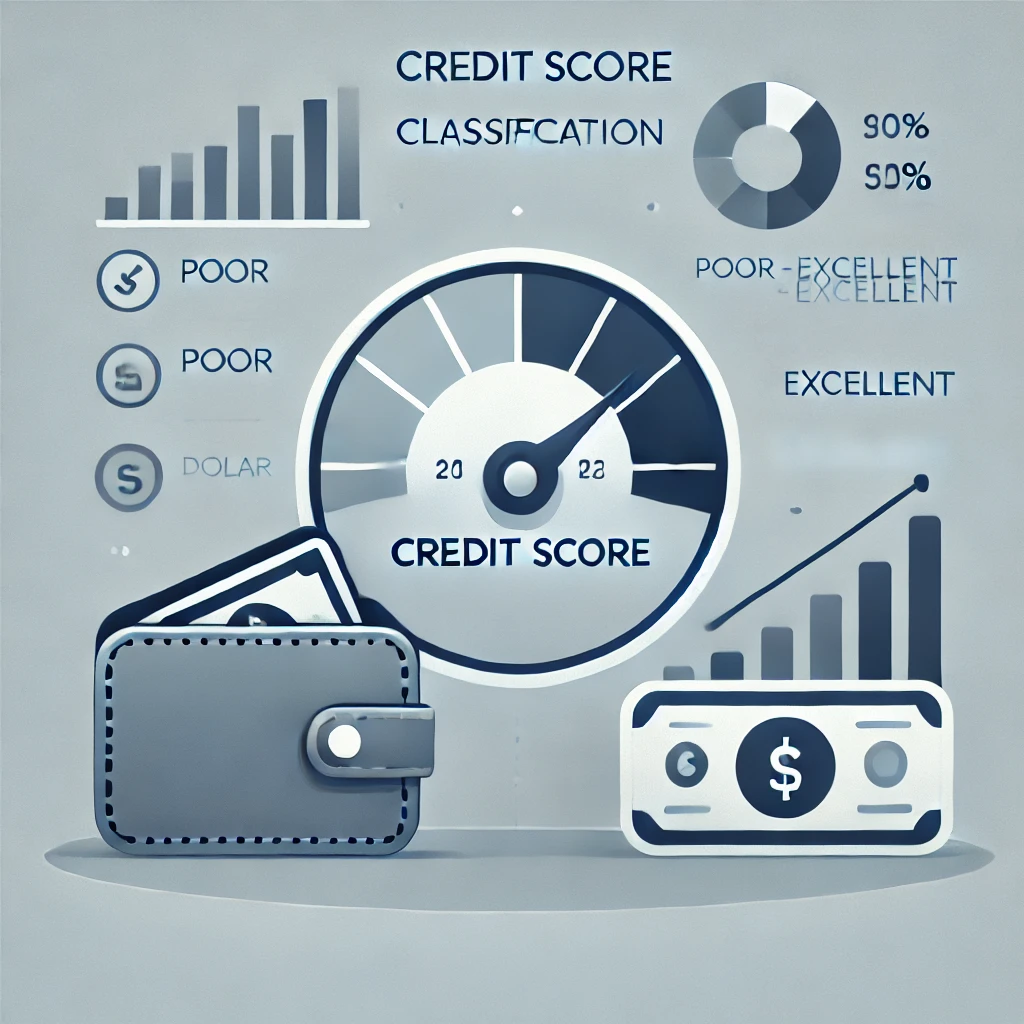

### **BUSINESS PROBLEM**
A credit company currently faces a high risk of loan defaults, which directly impacts profitability and increases operational costs associated with debt recovery. Many customers who are approved for credit loans may not have the financial stability or creditworthiness to manage debt effectively, leading to missed payments and default. The company needs a robust way to evaluate applicants’ eligibility for credit loans to reduce the likelihood of default and ensure that only financially responsible customers are approved.

### **BUSINESS OBJECTIVES:**
**Minimize Loan Default Rates:** Implement a data-driven model to predict and identify high-risk customers likely to default on loans, thereby reducing the overall loan default rate.

**Improve Loan Eligibility Assessment:** Develop a systematic method for assessing creditworthiness by using key financial and behavioral indicators (such as outstanding debt, credit history, income level, and payment behavior) to make more accurate loan approval decisions.

**Enhance Profitability through Risk Management:** By approving loans primarily for customers with strong credit profiles, the company can decrease losses due to defaults and increase profitability.

**Increase Customer Retention of Low-Risk Borrowers:** Retain and attract low-risk customers by offering favorable loan terms to those who demonstrate financial responsibility, thereby improving customer loyalty and satisfaction among reliable borrowers.

**Support Financial Health of Borderline Customers:** Provide resources or alternative loan products for borderline customers who are not immediately eligible for standard loans. This could include smaller loans or financial education programs to help these customers improve their creditworthiness, creating a pipeline of future eligible customers.

### **DATA UNDERSTANDING**
**Identification Columns:**
ID, Customer_ID: Unique identifiers for records and customers, likely strings.

**Demographic Information:**
Name, Age, SSN, Occupation: Descriptive attributes about customers.
Financial and Credit Attributes:

**Income Inofrmation:**
Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card: Count of banking products, possibly integers.
Interest_Rate, Outstanding_Debt, Credit_Utilization_Ratio: Financial metrics, potentially floats.
Num_of_Loan, Type_of_Loan: Loan-related info, with Type_of_Loan listing loan types.

**Behavioral and Payment Information:**
Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries: Indicators of payment history and credit management.
Payment_Behaviour, Payment_of_Min_Amount: Details on payment patterns, possibly strings or categories.
Monthly_Balance, Total_EMI_per_month, Amount_invested_monthly: Monthly financial metrics, possibly floats.

The source of the data is Kaggle through their website https://www.kaggle.com/datasets






In [ ]:
#Import libraries and warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score


import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Import data
data = pd.read_csv("/content/train.csv.zip")
pd.options.display.max_columns = None
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
#Understanding the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

From this we obtain several facts from the data:
*   Integer columns are in bject form dtype.
*   We have columns with null values.



In [ ]:
#Checking for data shape
data.shape

(100000, 28)

The data has 100000 values and 28 columns

In [ ]:
#Check statistical info of the data
data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


#### **DATA PREPROCESSING**

### Data Preparation

The aim of data preparation is to:
*   Check on data validity.
*   Check on data consistency(duplicates).
*   Check data uniformity(data types)
*   Check data completeness(null values)

**Uniformity**

Checking that we have the correct data types.

In [ ]:
data.dtypes

,0
ID,object
Customer_ID,object
Month,object
Name,object
Age,object
SSN,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64


In [ ]:
# Define the list of columns to convert to float
columns_to_convert = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
                      'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']

# Convert each column to float, handling errors
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')


**Consistency**

Checking for duplicate values

In [ ]:
#Check for duplicates
data.duplicated().sum()

0

The data has no duplicates

**Completeness**

Checking for null values

In [ ]:
#Check null entries
data.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,4939
SSN,0
Occupation,0
Annual_Income,6980
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


There are several columns with  empty values

In [ ]:
#Define a function to find missing data
def columns_with_missing_values(data):
    missing_values = data.isnull().sum()
    missing_columns = missing_values[missing_values > 0]
    return missing_columns.to_frame()

In [ ]:
columns_with_missing_values(data)

,0
Name,9985
Age,4939
Annual_Income,6980
Monthly_Inhand_Salary,15002
Num_of_Loan,4785
Type_of_Loan,11408
Num_of_Delayed_Payment,9746
Changed_Credit_Limit,2091
Num_Credit_Inquiries,1965
Outstanding_Debt,1009


In [ ]:
#Imputing
null_columns = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_of_Loan', 'Num_of_Delayed_Payment',
                      'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
for column in null_columns:
  mean = data[column].mean()
  data[column].fillna(mean, inplace = True)

We no longer have null values for our numeric data. Our object columns however still has null values. Some of the columns will be dropped as they may not have any weight on the purpose of the project.

In [ ]:
#Replacing the underscore with 'other'
data["Occupation"] = data["Occupation"].str.replace("_______" , "Other")

### **Exploratory Data Analysis**

Count Plots for category columns

In [ ]:
#Rename !@9#%8' in payment behaviour category with 'Unknown'
data['Payment_Behaviour'] = data['Payment_Behaviour'].replace('!@9#%8', 'Unknown')

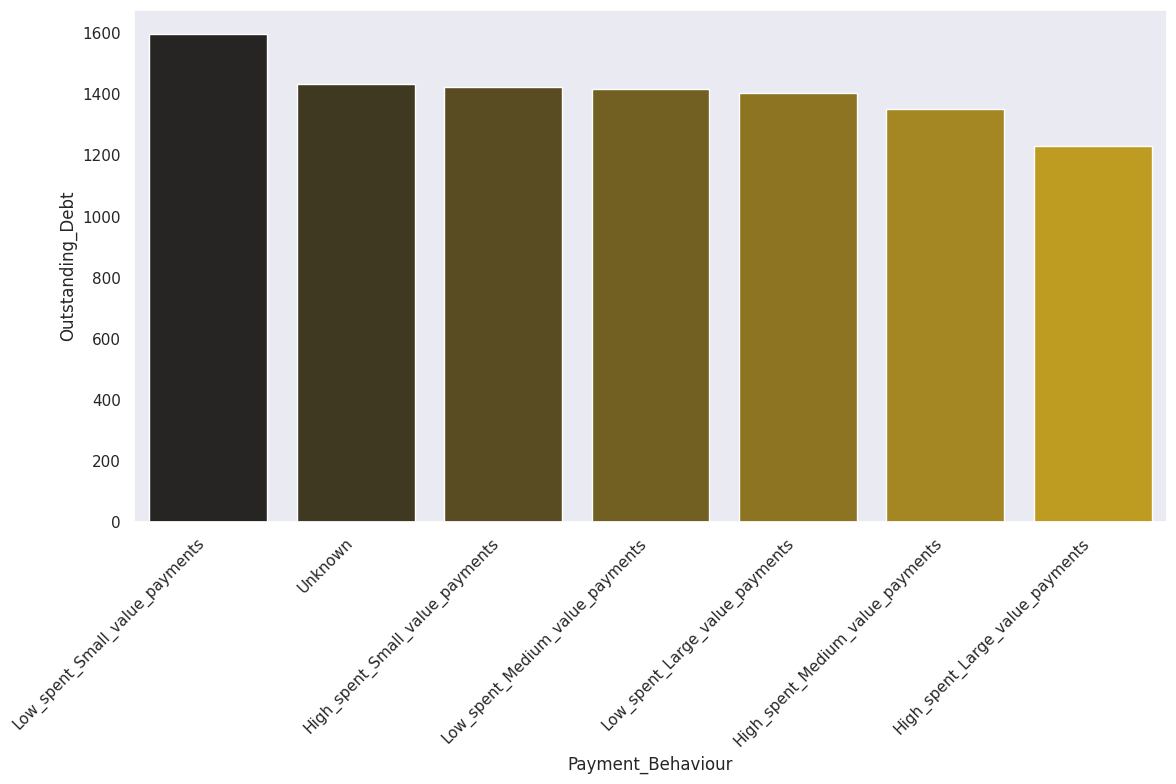

In [ ]:
# Sort the data by the mean of 'Num_of_Loan' for each 'Occupation'
sorted_data = data.groupby('Payment_Behaviour')['Outstanding_Debt'].mean().sort_values(ascending=False).index

#Set style for the plot
sns.set(style='dark')


#Plot monthly average of outstanding debt
color = sns.dark_palette("xkcd:golden", 8)
plt.figure(figsize=(12, 8))
sns.barplot(data=data, x='Payment_Behaviour', y='Outstanding_Debt', estimator=np.mean, ci=None, order = sorted_data, palette = color)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


*  Low_spent_Small_value_payments: customers who spend small amounts of money and make frequent, smaller payments. These individuals may have low overall spending but still maintain consistent payment behavior, potentially indicating a conservative approach to managing their finances. Their oustanding_debt however is the highest.
*  High_spent_Medium_value_payments: Customers in this category might be spending relatively larger amounts of money and making medium-sized payments. This could indicate people who have moderate-to-high expenditures but manage to keep up with their payments fairly well, suggesting a stable financial situation.
*  High_spent_Large_value_payments: This category probably includes customers who make large expenditures and pay off these amounts in larger sums. These individuals might be using credit or loans for significant purchases but are capable of paying back substantial amounts, which could be a sign of strong financial health. Thsi group of individuals have the lowest average of outstanding debt.
*   Low_spent_Medium_value_payments: This group likely includes people who don't spend much overall but still make payments that are medium in value. They might not have high spending levels, but their payments indicate a stable ability to manage finances, possibly on a moderate income.
*   High_spent_Small_value_payments: This category could indicate customers who spend a lot overall but prefer to make smaller payments more frequently. This might suggest a strategy to manage cash flow by spreading out payments even though they have high expenses.
*   Low_spent_Large_value_payments: Customers in this group have lower spending levels but tend to make larger payments when they do spend. This could indicate individuals who prefer to pay off their debts or expenses in significant amounts, which might mean they save up for purchases and pay them off in bulk.














In [ ]:
#Replace '-' with unknown
data['Credit_Mix'] = data['Credit_Mix'].replace('_', 'Unknown')

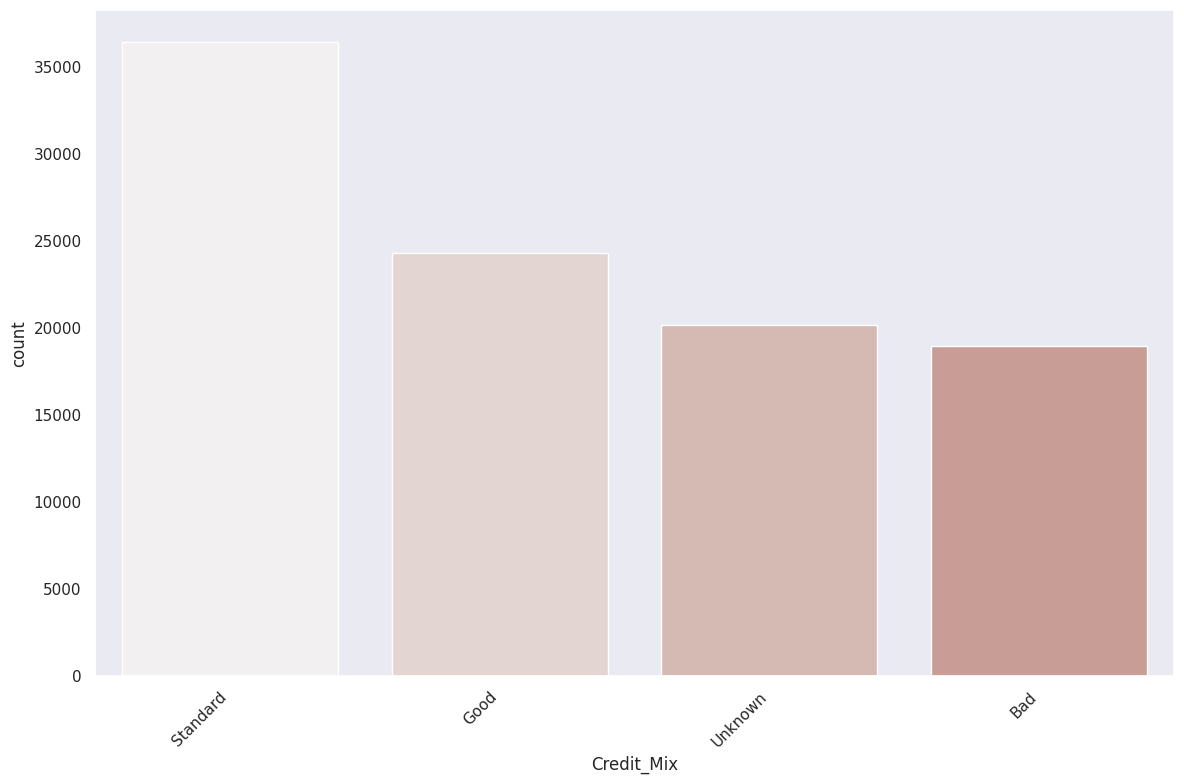

In [ ]:
# Calculate the order of categories based on their size
sorted_categories = data['Credit_Mix'].value_counts().index

# Plot the count plot
color = sns.light_palette((20, 60, 50), input="husl")
plt.figure(figsize=(12, 8))
sns.countplot(
    x='Credit_Mix',
    data=data,
    palette=color,
    order=sorted_categories  # Align bars by size
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Most of the customers have a standard credit mix. However ~20000 individuals have credit mixes whose information may either be ambiguous, inconsistent or not enough data to determine their where thy fall. We keep this in mind.

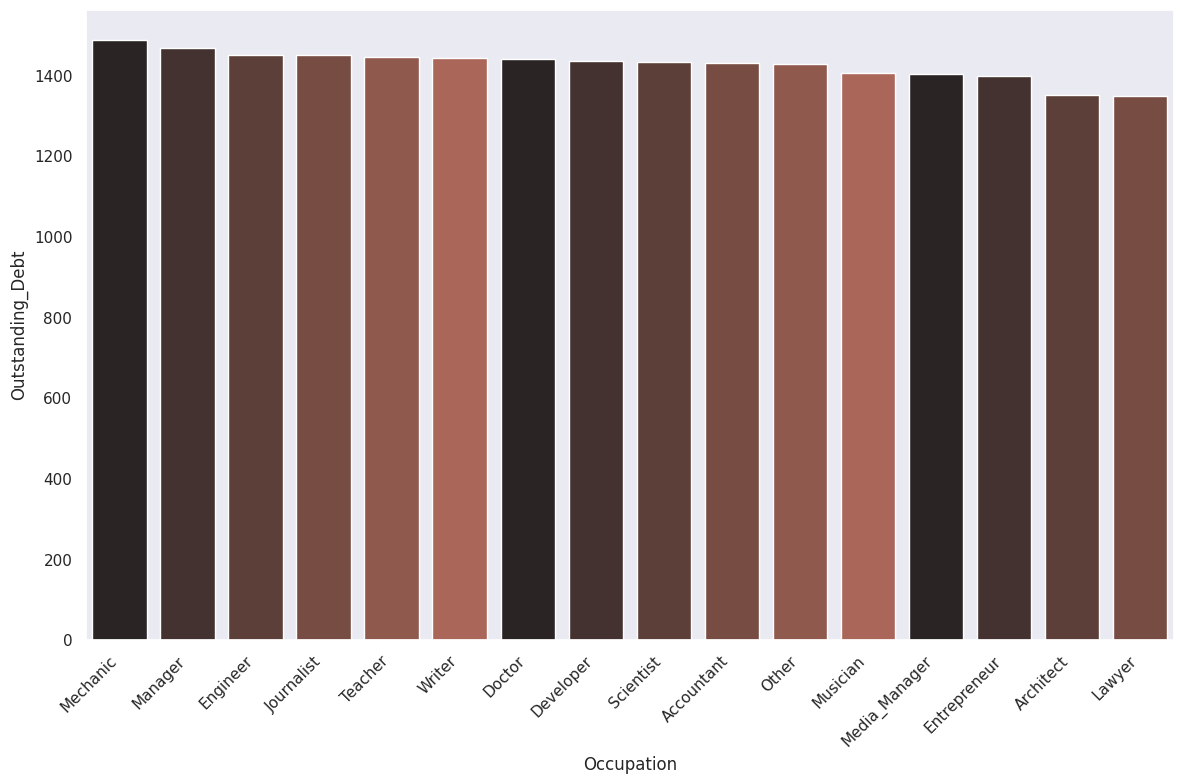

In [ ]:
# Sort the data by the mean of 'Num_of_Loan' for each 'Occupation'
sorted_data = data.groupby('Occupation')['Outstanding_Debt'].mean().sort_values(ascending=False).index

color = sns.dark_palette((20, 60, 50), input="husl")

plt.figure(figsize=(12, 8))
sns.barplot(data = data, x = 'Occupation', y= 'Outstanding_Debt', estimator = np.mean, order = sorted_data, ci = None, palette = color)
#plt.xlim(0,15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The customers have an average of 1300 of outstanding debt regardless of occupation.

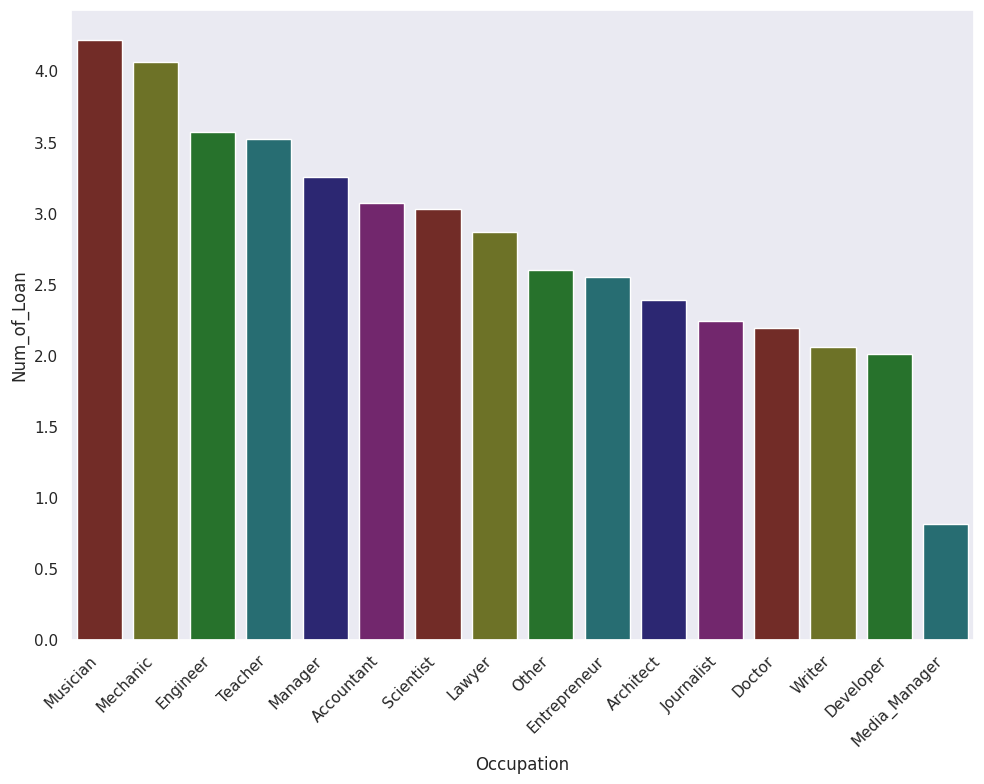

In [ ]:
# Sort the data by the mean of 'Num_of_Loan' for each 'Occupation'
sorted_data = data.groupby('Occupation')['Num_of_Loan'].mean().sort_values(ascending=False).index

#Plot the barplot
color = sns.hls_palette(l=.3)
plt.figure(figsize = (10,8))
sns.barplot(data, x = 'Occupation', y = 'Num_of_Loan', order = sorted_data, palette = color, ci = None)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




Musicican seem to have a higher number of loans compared to media-managers who have a lower number of loans. However the data seems to be compromised with number o floans less than 0. Teachers nad engineers on the other hand seesm to have a similar distribution of the numbr of looans for each.

## Correlation

To determine the correlation of columns to each other

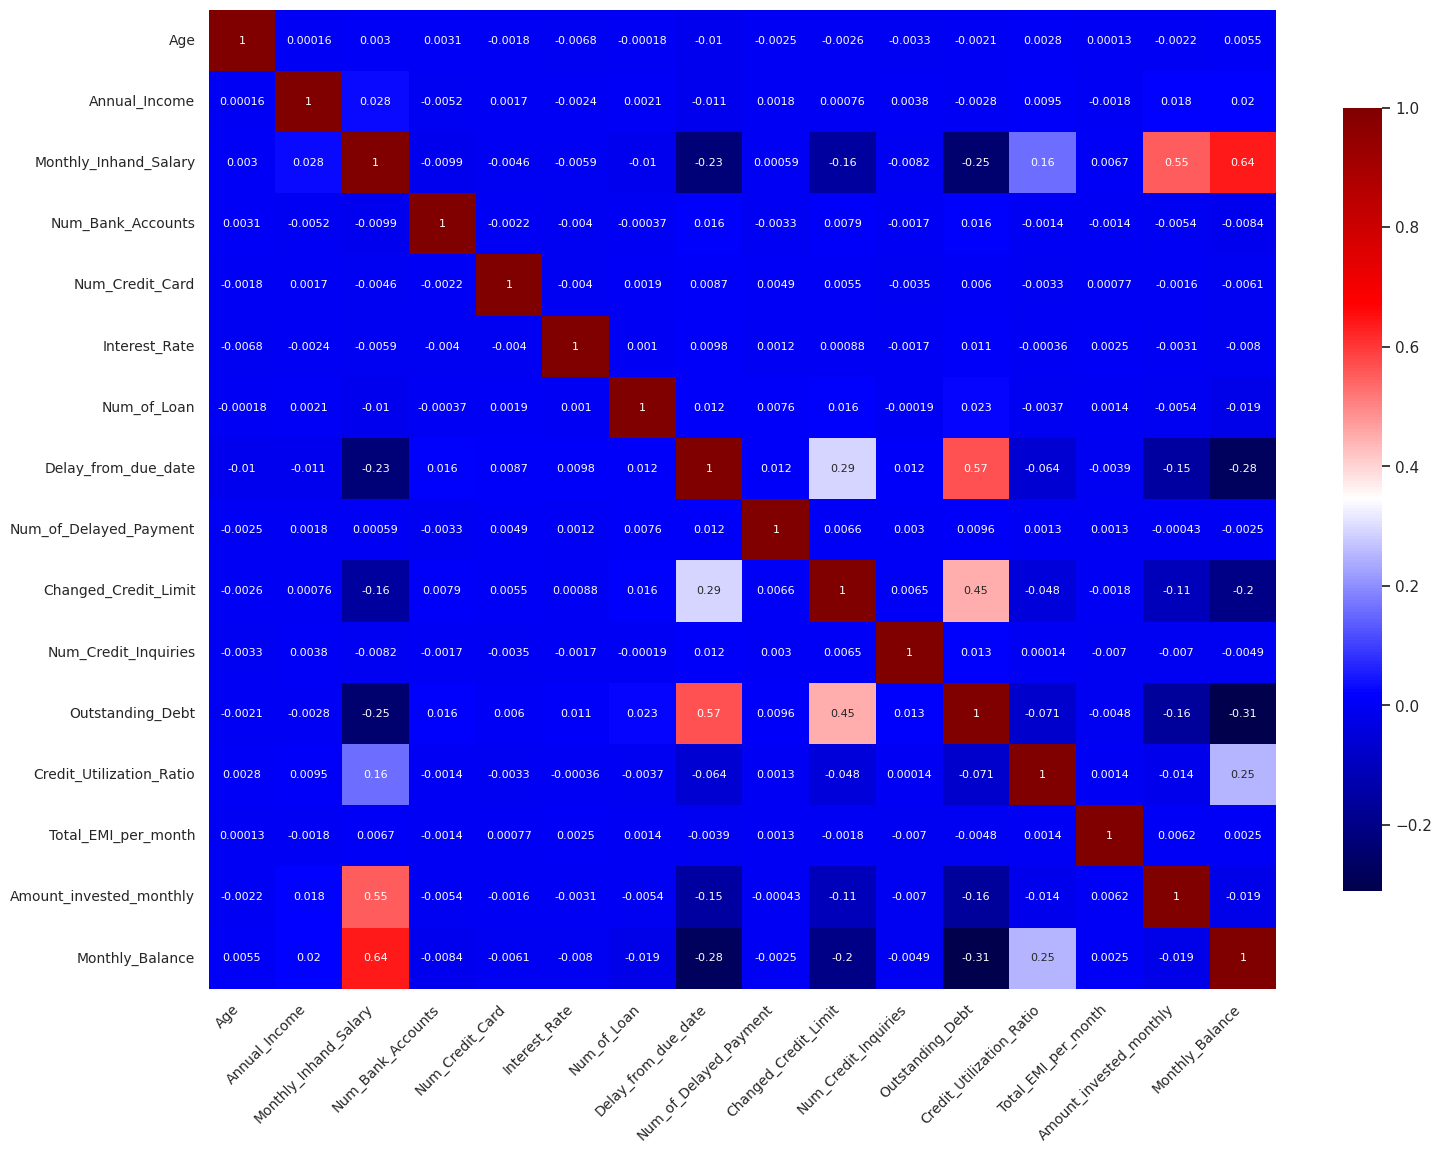

In [ ]:
plt.figure(figsize=(16, 12))  # Larger heatmap size
sns.heatmap(
    numeric_columns.corr(),
    annot=True,
    cmap='seismic',
    annot_kws={"size": 8},  # Adjust annotation font size
    cbar_kws={"shrink": 0.8}  # Shrink color bar
)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels
plt.yticks(fontsize=10)  # Adjust y-axis labels
plt.tight_layout(pad=2)  # Add padding
plt.show()

From the heatmap it is observed that amount_invested_monthly and monthly_inhand_salary, outstanding_debt and delay_from_due_date and monthly_balance and monthly_inhand_salary have quite strong correlations. Correlation however does not mean causation.

### **Feature Engineering**

In [ ]:
#Clean up categories to encode
cols = ['Credit_Mix', 'Payment_Behaviour', 'Type_of_Loan']

for col in cols:
    counts = data[col].value_counts()
    print(f'Value counts for {col}:\n{counts}\n')


Value counts for Credit_Mix:
Credit_Mix
Standard    36479
Good        24337
Unknown     20195
Bad         18989
Name: count, dtype: int64

Value counts for Payment_Behaviour:
Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Unknown                              7600
Name: count, dtype: int64

Value counts for Type_of_Loan:
Type_of_Loan
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan  

Credit_Mix column has an unkwon category.Assumption could be that the information was not suffcient to cataegorise the customer into either of the other 3 categories. We willd drop these rows.
Payment_behaviour also has a category that is uncategorised.It does not add value to the column.
Type_of_Loan column has too many categories that would crerate too many columns.

In [ ]:
# Drop rows where 'Credit_Mix' has the value 'Unknown'
data.drop(data[data['Credit_Mix'] == 'Unknown'].index, inplace=True)

# Drop rows where 'Payment_Behaviour' has the value 'Unknown'
data.drop(data[data['Payment_Behaviour'] == 'Unknown'].index, inplace=True)


In [ ]:
#Confirm cleaned rows
cols_1 =['Credit_Mix', 'Payment_Behaviour']

for col in cols_1:
    counts = data[col].value_counts()
    print(f'Value counts for {col}:\n{counts}\n')

Value counts for Credit_Mix:
Credit_Mix
Standard    33707
Good        22491
Bad         17511
Name: count, dtype: int64

Value counts for Payment_Behaviour:
Payment_Behaviour
Low_spent_Small_value_payments      20272
High_spent_Medium_value_payments    14065
Low_spent_Medium_value_payments     11094
High_spent_Large_value_payments     10949
High_spent_Small_value_payments      8988
Low_spent_Large_value_payments       8341
Name: count, dtype: int64



### Convert Years and Months in Credit_History_Age column to months

For better processing, we need to convert Credit_History_Column from years and months to months.We will define a function for this operation.

In [ ]:
# Function to convert 'X years and Y months' to total months
def convert_to_months(value):
    if isinstance(value, str):  # Check if the value is a string
        years = 0
        months = 0
        # Extract the number of years
        if 'year' in value.lower():
            years_part = value.lower().split('year')[0].strip()
            years = int(years_part) if years_part.isdigit() else 0
        # Extract the number of months
        if 'month' in value.lower():
            months_part = value.lower().split('and')[-1].split('month')[0].strip()
            months = int(months_part) if months_part.isdigit() else 0
        # Calculate the total months
        total_months = (years * 12) + months
        return total_months
    else:
        return np.nan

In [ ]:
# Apply the function to the Credit_History_Age column
data['Credit_History_Age_in_months'] = data['Credit_History_Age'].apply(convert_to_months)

# Display the result
#print(data.head())

In [ ]:
# Drop rows with NaN values in the 'Credit_History_Age_in_months' column
data.dropna(subset=['Credit_History_Age_in_months'], inplace=True)

# Display the result
#print(data.head())


**Encoding**

There are categorical columns that need to be encoded. Before doing so, there are null values that should be dropped before  encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Select the categorical columns to encode
categorical_columns = ['Credit_Mix', 'Payment_Behaviour', 'Credit_Score']

# Apply label encoding to each categorical column
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Display the result
data.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_months
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,4194.170850,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.000000,10.389025,4.0,1,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,4,331.209863,0,267.0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,4194.170850,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.000000,6.270000,4.0,1,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,5,223.451310,0,268.0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,31.033051,11.270000,4.0,1,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,1,341.489231,0,269.0
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,31.033051,11.270000,4.0,1,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,5,244.565317,0,271.0
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,NaN,004-07-5839,_______,34847.84,3037.986667,2,4,6,1.0,Credit-Builder Loan,3,4.000000,5.420000,2.0,1,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,5,470.690627,2,319.0


In [ ]:
data.shape

(67058, 29)

The number of columns has increased since every category in the encoded columns is assigned its own column.On the other hand, the number of rows has decreased since most of the columns had null categorical rows.

In [ ]:
# Define the list of columns to drop as a list of column names (strings)
drop_columns = ['ID', 'Customer_ID', 'Name', 'Num_Bank_Accounts', 'Num_Credit_Card',
                'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Payment_of_Min_Amount',
                'Month', 'Age', 'SSN', 'Monthly_Inhand_Salary', 'Total_EMI_per_month',
                'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
                'Credit_Utilization_Ratio', 'Credit_History_Age', 'Amount_invested_monthly']

# Drop the specified columns from the data
data.drop(columns=drop_columns, inplace=True)

# Check the number of columns remaining
data.shape


(67058, 9)

In [ ]:
#Define independent and dependent columns
X = data.drop(columns = ['Credit_Score', 'Occupation'], axis = 1)
y = data['Credit_Score']

In [ ]:
#Initialize standard scaler
scaler = StandardScaler()

#Fit and transform X
X_scaled = scaler.fit_transform(X)

#Convert to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

### **Data Imbalance**

Credit_Score is our dependent variable. An imbalance in the numbers of the categories will result in a bias model to the majority class. Therefore, a balance is needed which will use SMOTE analysis.

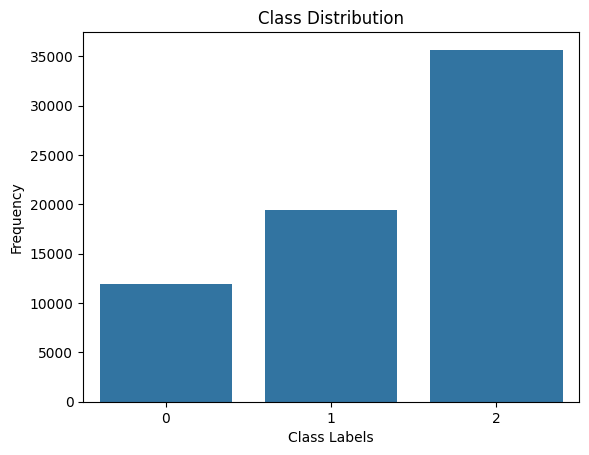

In [ ]:
# Plot the class distribution
sns.countplot(x=y)
plt.title('Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.show()


Class 2 has more than thrice as much values as class 0. Thsi would lead to a bias model, which would bend towards the majority class.

**SMOTE**

SMOTE is a technique that synthetically generates more of the minority class with to match it up to the majority class. In this case more rows of class 0 & 1 will be generated to match up to the numbers class 2.

In [ ]:
# Initialize SMOTE with a random state for reproducibility
smote = SMOTE(random_state=42)

# Apply SMOTE
X_balanced, y_balanced = smote.fit_resample(X, y)

# Check the class distribution after applying SMOTE
print("Class distribution before SMOTE: \n", y.value_counts())
print("Class distribution after SMOTE: \n", y_balanced.value_counts())


Class distribution before SMOTE: 
 Credit_Score
2    35676
1    19439
0    11943
Name: count, dtype: int64
Class distribution after SMOTE: 
 Credit_Score
0    35676
2    35676
1    35676
Name: count, dtype: int64


Categories hold same weight and wouldn't bias the model.

**Split the data to train and test data**

In [ ]:
#Split the data into training and data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size = 0.2, random_state = 42 )

### **Model Selection**

**Logistic Regression**

In [ ]:
#Initialize the model
lr = LogisticRegression(max_iter=1000)


#Fit the model
lr.fit(X_train, y_train)

#Use the model to predict on testing data
y_pred_lr = lr.predict(X_test)

#Prediction probabilities
y_pred_lr_prob = lr.predict_proba(X_test)

#Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)
matrix_lr = confusion_matrix(y_test, y_pred_lr)

print("Accuracy:", accuracy_lr)
print("Classification Report:", report_lr)
print("Confusion Matrix:", matrix_lr)

Accuracy: 0.5563860599831822
Classification Report:               precision    recall  f1-score   support

           0       0.52      0.78      0.62      7081
           1       0.70      0.70      0.70      7100
           2       0.39      0.20      0.26      7225

    accuracy                           0.56     21406
   macro avg       0.54      0.56      0.53     21406
weighted avg       0.54      0.56      0.53     21406

Confusion Matrix: [[5512  214 1355]
 [1250 4962  888]
 [3908 1881 1436]]


Logistic regression perfroms averagely on thsi dataset. A perfromance rate of 55.6% is not too bad, but we should see a better performing model.

**Random Forest Classifier**

In [ ]:
#Initialize RandomForestClassifier
rf = OneVsRestClassifier(RandomForestClassifier(random_state = 42))

#Fit the model
rf.fit(X_train, y_train)

#Predict the modle using the test data
y_pred_rf = rf.predict(X_test)

#Prediction probability
y_pred_rf_prob = rf.predict_proba(X_test)

#Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.8039801924694011
              precision    recall  f1-score   support

           0       0.78      0.92      0.85      7081
           1       0.82      0.81      0.82      7100
           2       0.82      0.68      0.74      7225

    accuracy                           0.80     21406
   macro avg       0.81      0.80      0.80     21406
weighted avg       0.81      0.80      0.80     21406

[[6514   91  476]
 [ 720 5785  595]
 [1101 1213 4911]]


Random Forest is an ensemble method that combines several decision trees. On this dataset, it seemes to have perfromed quite well with an accuracy score of 80.3%. A more complex model can be used to evaluate of this is the best performing model on this dataset.

**XG Boost**

In [ ]:
#Initialize the model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

#Fit the model
xgb.fit(X_train, y_train)

#Precit using the testing data
y_pred_xgb = xgb.predict(X_test)

#Prediction probability
y_pred_xgb_prob = xgb.predict_proba(X_test)

#Print evaluation of the model
print(accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

0.7660469027375503
              precision    recall  f1-score   support

           0       0.73      0.91      0.81      7081
           1       0.78      0.76      0.77      7100
           2       0.80      0.63      0.71      7225

    accuracy                           0.77     21406
   macro avg       0.77      0.77      0.76     21406
weighted avg       0.77      0.77      0.76     21406

[[6426  146  509]
 [1067 5387  646]
 [1250 1390 4585]]


Despite being a more complex model, XG Boost does not perform better than Random Forest Classifier. An accuracy score of 76.6% is not too bad. However we will not pick this model for our dataset.

#### **Multiclass ROC-Curve**

ROC-Curve is a measure of model performance that is combined with other metrics. It measures sensitivity and 1-specificity of the model. Generally we want to see a large area between the curve and the 45 degreess diagoonal line. We also use the AUC(area under curve) as a measure of perfromance. For a model that is performing well, the AUC is greater than 0.7. We will use these measures to confirm that our accuracy score is inline with ROC-AUC.

**Combined performance of all models**

This aims at capturing which class is better predicted based on combined probabilities of the three models.

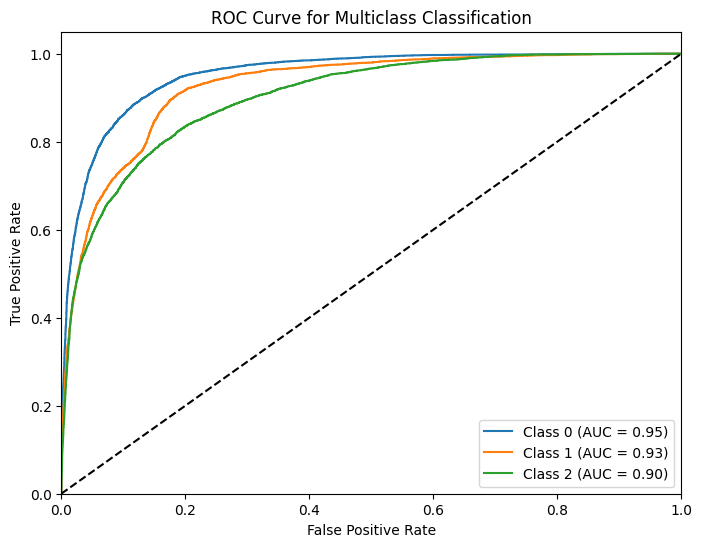

In [ ]:
#Binarize the output (convert it into one-vs-all format)
#y_binarized = label_binarize(y_train, classes=[0, 1, 2])

# Binarize the y_test
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Combine the probabilities for plotting the ROC curve
y_pred_prob_combined = (y_pred_lr_prob + y_pred_rf_prob + y_pred_xgb_prob) / 3

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
thresh = {}
roc_auc = dict()

# Number of classes
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob_combined[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 4: Plot the ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()


Class 0 is better predicted compared to class 1 and class 2. It has a greater AUC value of 0.94.

**Performance of each model on each class**

We can further check on how each model individually performs on predicting each class.

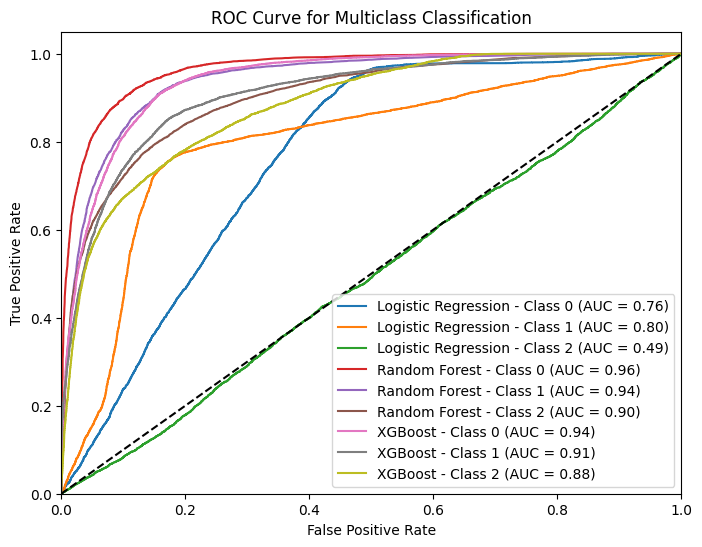

In [ ]:
#Binarize the output (convert it into one-vs-all format)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Number of classes
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and ROC area for each class for logistic regression
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_lr_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for Logistic Regression
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Logistic Regression - Class {i} (AUC = {roc_auc[i]:.2f})')

# Compute ROC curve and AUC for Random Forest
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_rf_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for Random Forest
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Random Forest - Class {i} (AUC = {roc_auc[i]:.2f})')

# Compute ROC curve and AUC for XGBoost
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_xgb_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for XGBoost
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'XGBoost - Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()

As earlier confirmed by accuracy_score metric, Random Forest does well on predicting all three classes better than all other models.Despite being in close range with XGBoost, Random Forest outdoes XGBoost on predicting class 1. Therefore, we can confirm that Random Forest is our best model.

### **Hyperparameter Tuning**

We have identified that Random Forest is our best model based on the above metrics with an accuracy score of 74.7%. However, a model's parameters can be tuned for optimized performance. Random Forest in this case can perform better when parameters such as no_of_estimators, max_depth and no_of_iterations.

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50,100],  # Number of trees in the forest
    'max_depth': [None, 2],  # Maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt']  # Number of features to consider when looking for the best split
}
#Initialize Random Forest
rf_classifier = RandomForestClassifier(random_state = 42)

#Initialize GridSearchCV
grid_search = GridSearchCV(estimator = rf_classifier,param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 2)

#Fit the model
grid_search.fit(X_train, y_train)

#Find best parameters
best_params = grid_search.best_params_
print("Best parameters are:", best_params)

# Get the best model
rf_best = grid_search.best_estimator_

#Test accuracy
y_pred_rf_best = rf_best.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred_rf_best))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

#### **Feature Importance**

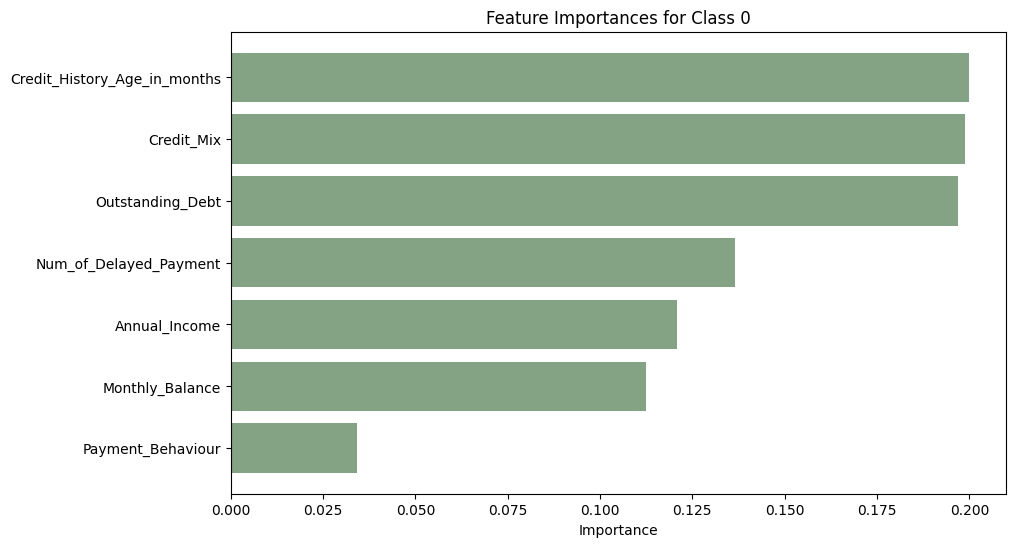

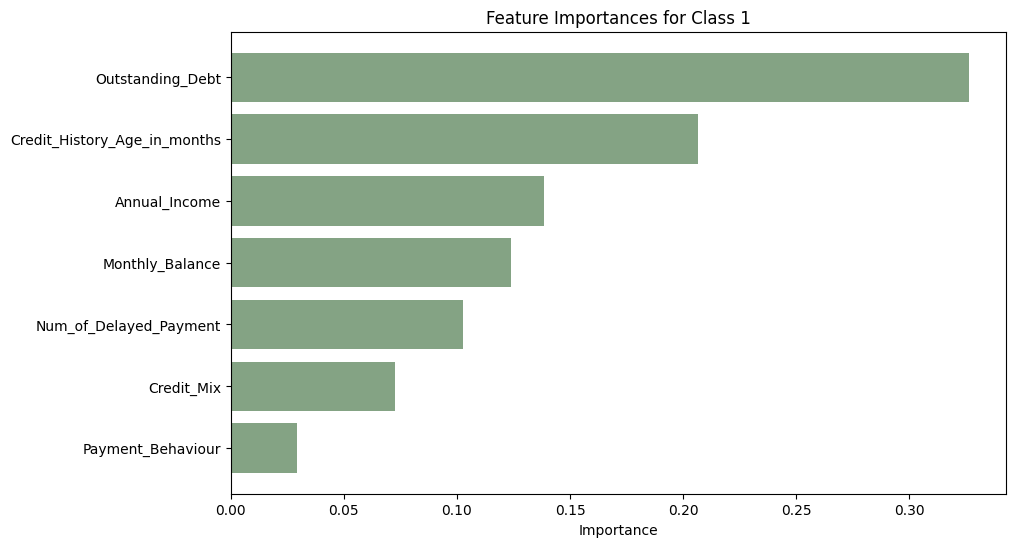

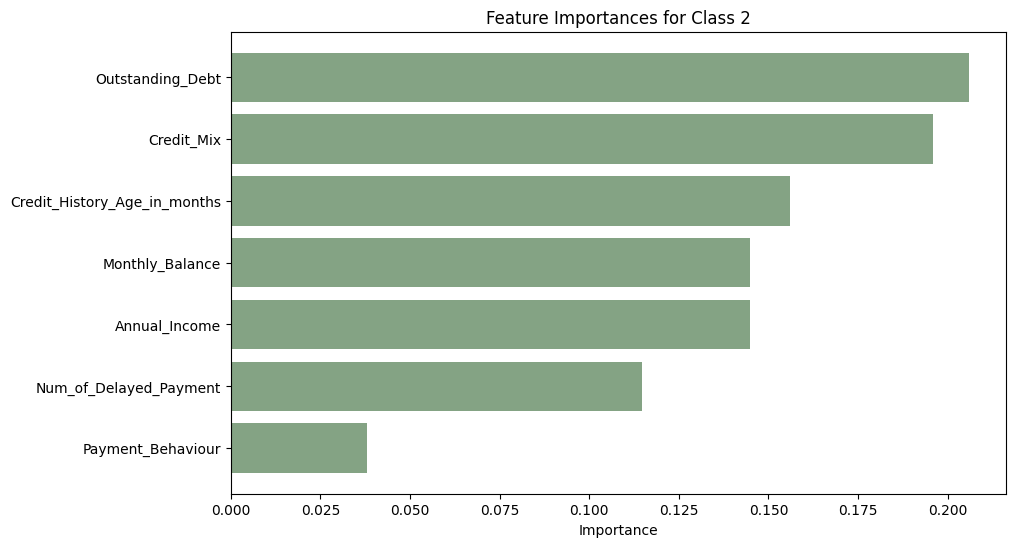

In [ ]:
# Assuming you have a list of feature names
feature_names = X_train.columns

# Loop through each binary classifier to plot feature importances for each class
for idx, estimator in enumerate(rf.estimators_):
    # Create a DataFrame for feature importances
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': estimator.feature_importances_
    })

    # Sort features by importance
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importances
    color = (0.2, 0.4, 0.2, 0.6)
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color=color)
    plt.xlabel('Importance')
    plt.title(f'Feature Importances for Class {idx}')
    plt.gca().invert_yaxis()
    plt.show()

In [ ]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier on the training data
rf_classifier.fit(X_train_processed, y_train)

# Get feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

print(feature_importance_df)

In [ ]:
# Print the mapping of labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label encoding mapping:", label_mapping)

Label encoding mapping: {'Good': 0, 'Poor': 1, 'Standard': 2}


### **CONCLUSION**

#### **Key Insights**

**Outstanding Debt**: This feature is consistently important across all classes, suggesting that the amount of outstanding debt significantly influences the classification. High levels of outstanding debt may indicate a higher likelihood of classification into certain risk categories.

**Credit History Age in Months:** This feature is also crucial, particularly in Class 0 and Class 1, indicating that longer credit histories are viewed positively by the model. A well-established credit history appears to be an important factor in assessing the reliability or risk associated with each class.

**Credit Mix:** The diversity in the types of credit accounts (credit mix) has a high impact on model classification, especially in Class 0 and Class 2. Having a balanced mix of credit types might contribute positively toward classification into lower-risk classes.

**Annual Income:**This feature, while less impactful than credit history and outstanding debt, still plays a meaningful role in influencing the classification, especially for Class 1 and Class 2. Higher income might be associated with a lower risk.

**Monthly Balance and Number of Delayed Payments:** These features are moderately important across the classes, suggesting that maintaining a consistent balance and minimizing payment delays contribute to lower risk classifications.

**Payment Behaviour:** While this feature has relatively lower importance across all classes, it still influences the classification. Consistent payment behavior might contribute slightly toward more favorable classifications.

#### **Recommendations**

**Prioritize Debt Management:** Since Outstanding Debt is the most significant feature in predicting risk, the company should set stricter thresholds on debt levels for loan eligibility. Only customers with manageable levels of outstanding debt should be considered for credit loans. Additionally, the company could develop programs that help customers reduce their debt to become eligible for future loans, such as offering debt consolidation services or financial counseling.

**Encourage Long Credit Histories:** Given the high importance of Credit History Age, the credit company should consider customers with longer credit histories as lower-risk candidates. For customers with short credit histories, the company could offer smaller, short-term loans initially and gradually increase limits as they build their credit history. This approach helps mitigate risk while allowing newer credit users a chance to qualify and prove creditworthiness over time.

**Assess Credit Mix Diversity:** The impact of Credit Mix suggests that customers with a balanced mix of credit accounts (such as revolving credit and installment loans) are more reliable. The company can use this insight to favor applicants who show responsible use across different credit types. For customers with limited credit mix, the company could provide educational resources about the benefits of a balanced credit mix, helping them to improve eligibility in the long run.

**Establish Income Requirements for Loans:** Since Annual Income plays a meaningful role, setting minimum income thresholds for loan eligibility can help reduce default rates. For customers near the income cutoff, the company could offer customized loan products with lower credit limits or shorter repayment terms, thus managing risk more effectively.

**Incentivize Positive Monthly Balance and Timely Payments:** Features like Monthly Balance and Number of Delayed Payments indicate financial stability. The credit company could reward consistent monthly balances and on-time payments by offering better loan terms (e.g., lower interest rates or higher credit limits). These incentives would encourage customers to maintain financial stability, making them more reliable loan candidates.

**Screen for Consistent Payment Behavior:** While Payment Behavior is a less critical feature, it still impacts risk classification. The company should screen for applicants with a history of late or irregular payments and consider them higher-risk candidates. For customers with a history of inconsistent payments, offering smaller loans initially or implementing stricter repayment terms may help mitigate risk.






